In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
def perform_regression_analysis(X, Y, plot_enabled=False,  x_label="", y_label=""):

    ## Now we perform linear regression and plot it:
    r_model = linear_model.LinearRegression()

    ## Train the model to see the relation
    r_model.fit(ratings_std_dev, number_of_ratings)

    ## Predict the number of reviews
    predict_reviews_nums = r_model.predict(ratings_std_dev)

    ## Mean square error
    print("Mean squared error: %.2f" % mean_squared_error(number_of_ratings, predict_reviews_nums))

    ## r2_score
    print("R2 score: %.2f" % r2_score(number_of_ratings, predict_reviews_nums))

    if(plot_enabled == True):
        plt.scatter(ratings_std_dev, number_of_ratings, color="blue")
        plt.plot(ratings_std_dev, predict_reviews_nums, color="red", linewidth=2)
        plt.ticklabel_format(style='plain', axis='y')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()

Mean squared error: 59938014756.63
R2 score: 0.90


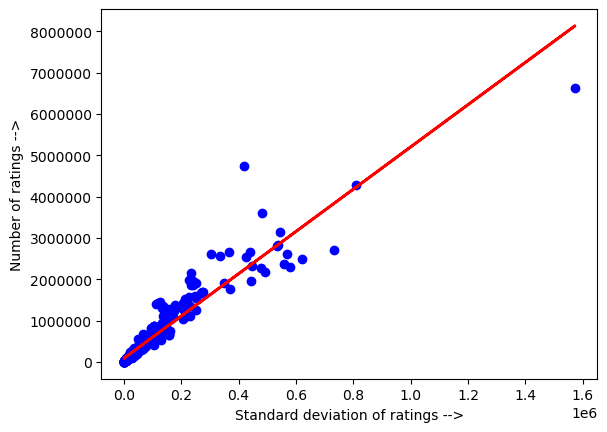

In [49]:
df =  pd.read_csv('BookDataset.csv')

ratings = df[['RatingDist5', 'RatingDist4', 'RatingDist3', 'RatingDist2',
       'RatingDist1']]

ratings_std_dev = np.std(ratings, axis=1).to_numpy().reshape(-1,1)

number_of_ratings = df[['RatingDistTotal']].to_numpy().reshape(-1,1)

perform_regression_analysis(ratings_std_dev, number_of_ratings,True, "Standard deviation of ratings -->", "Number of ratings -->")

Mean squared error: 59938014756.63
R2 score: 0.90


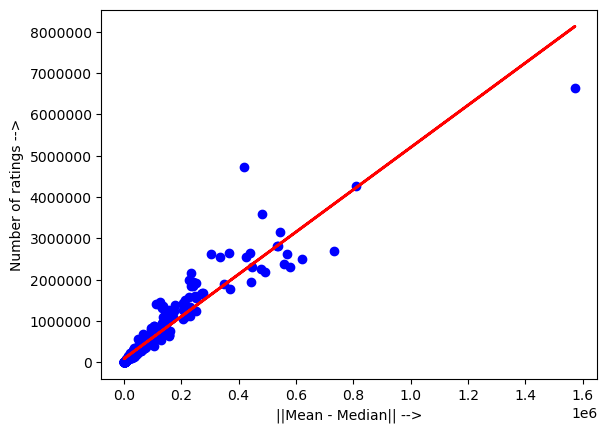

In [58]:
ratings_median = np.median(ratings, axis=1).reshape(-1,1)
ratings_mean = np.mean(ratings, axis=1).to_numpy().reshape(-1,1)

ratings_diff = abs(ratings_median - ratings_mean)

perform_regression_analysis(ratings_diff, number_of_ratings,True, "||Mean - Median|| -->", "Number of ratings -->")

Mean squared error: 59938014756.63
R2 score: 0.90


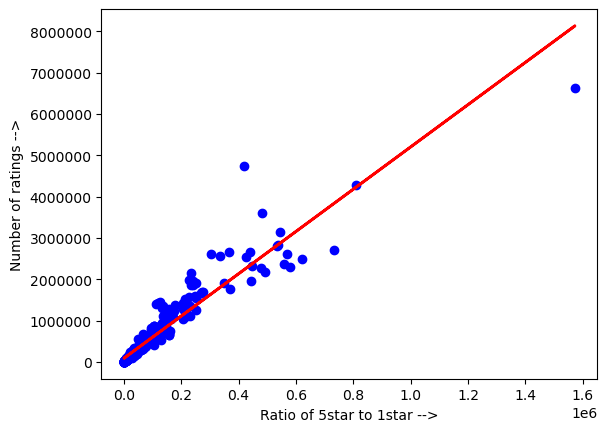

In [70]:
ratings_np = ratings.to_numpy()
ratio_5_1 = ratings_np[:,0] / ratings_np[:,4]
ratio_5_1 = ratio_5_1.reshape(-1, 1)


perform_regression_analysis(ratings_diff, number_of_ratings,True, "Ratio of 5star to 1star -->", "Number of ratings -->")